## Ear Ache abstracts pulled from 10 PubMed articles on 'Earache'

In [1]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt 
from textblob import TextBlob 
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 
 
np.random.seed(507) 
 


In [43]:
reviews = pd.read_csv('LemmatizedEarAchePain.csv', encoding = 'unicode_escape') 
#the encoding needed for python3 handling nonASCII chars


In [44]:
reviews


,lemmatizedAbstract,abstract,source,pain
0,Earache be one of the much common symptom for ...,Earache is one of the most common symptom for ...,PubMedAbstracts,yes
1,Introduction? a earache ( otalgia or ear pain ...,Introduction?An earache (otalgia or ear pain) ...,PubMedAbstracts,yes
2,Otalgia be a common symptom in general practic...,Otalgia is a common symptom in general practic...,PubMedAbstracts,yes
3,OBJECTIVE: To examine whether watchful wait be...,OBJECTIVE:\r\n\r\nTo examine whether watchful ...,PubMedAbstracts,no
4,BACKGROUND: Information on patient symptom can...,BACKGROUND:\r\n\r\nInformation on patient symp...,PubMedAbstracts,no
5,Many patient in primary care present with ear ...,Many patients in primary care present with ear...,PubMedAbstracts,yes
6,Many patient who present with otalgia have a n...,Many patients who present with otalgia have a ...,PubMedAbstracts,yes
7,The patient present with otalgia pose a diagno...,The patient presenting with otalgia poses a di...,PubMedAbstracts,yes
8,The importance of the cervical spine in routin...,The importance of the cervical spine in routin...,PubMedAbstracts,no
9,BACKGROUND: Otalgia be a common present sympto...,BACKGROUND:\r\n\r\nOtalgia is a common present...,PubMedAbstracts,no


In [45]:
reviews.shape

(10, 4)

In [46]:
reviews = reviews.reindex(np.random.permutation(reviews.index))

print(reviews)

                                  lemmatizedAbstract  \
6  Many patient who present with otalgia have a n...   
3  OBJECTIVE: To examine whether watchful wait be...   
4  BACKGROUND: Information on patient symptom can...   
8  The importance of the cervical spine in routin...   
2  Otalgia be a common symptom in general practic...   
9  BACKGROUND: Otalgia be a common present sympto...   
5  Many patient in primary care present with ear ...   
7  The patient present with otalgia pose a diagno...   
0  Earache be one of the much common symptom for ...   
1  Introduction? a earache ( otalgia or ear pain ...   

                                            abstract           source pain  
6  Many patients who present with otalgia have a ...  PubMedAbstracts  yes  
3  OBJECTIVE:\r\n\r\nTo examine whether watchful ...  PubMedAbstracts   no  
4  BACKGROUND:\r\n\r\nInformation on patient symp...  PubMedAbstracts   no  
8  The importance of the cervical spine in routin...  PubMedAbstracts   no 

In [47]:


reviews['length'] = reviews['abstract'].map(lambda text: len(text))
print(reviews.head())



                                  lemmatizedAbstract  \
6  Many patient who present with otalgia have a n...   
3  OBJECTIVE: To examine whether watchful wait be...   
4  BACKGROUND: Information on patient symptom can...   
8  The importance of the cervical spine in routin...   
2  Otalgia be a common symptom in general practic...   

                                            abstract           source pain  \
6  Many patients who present with otalgia have a ...  PubMedAbstracts  yes   
3  OBJECTIVE:\r\n\r\nTo examine whether watchful ...  PubMedAbstracts   no   
4  BACKGROUND:\r\n\r\nInformation on patient symp...  PubMedAbstracts   no   
8  The importance of the cervical spine in routin...  PubMedAbstracts   no   
2  Otalgia is a common symptom in general practic...  PubMedAbstracts  yes   

   length  
6    1172  
3    1161  
4    2074  
8     442  
2    1107  


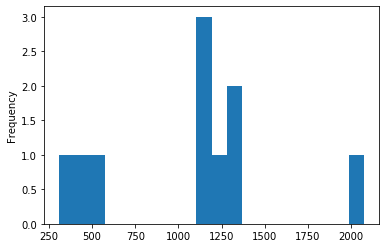

In [48]:
reviews.length.plot(bins=20, kind='hist') 

In [49]:
reviews.length.describe()

count      10.000000
mean     1075.200000
std       518.736242
min       311.000000
25%       705.750000
50%      1166.500000
75%      1309.250000
max      2074.000000
Name: length, dtype: float64

In [50]:
print(list(reviews.abstract[reviews.length > 1100].index)) #near the max for length of LemmatizedTweets
print(list(reviews.source[reviews.length > 1100]))
print(list(reviews.lemmatizedAbstract[reviews.length > 1100]))

[6, 3, 4, 2, 9, 5, 1]
['PubMedAbstracts', 'PubMedAbstracts', 'PubMedAbstracts', 'PubMedAbstracts', 'PubMedAbstracts', 'PubMedAbstracts', 'PubMedAbstracts']
['Many patient who present with otalgia have a normal otological examination, and a distant source of pain must be consider. The ear receive a extensive sensory innervation arise from six nerve root. Many other structure in the head, neck and thorax share a common neuronal pathway with the ear, and this tissue represent the possible site of disease in the case of refer otalgia. Consequently, the differential diagnosis be extensive and vary. make a accurate diagnosis rely on a understand of the complex distribution of nerve fibre and a structure approach to patient assessment. This article aim to classify the aetiology of refer otalgia and to outline current treatment for this condition. The origin of refer otalgia may be as remote as the cranial cavity and thorax; however, dental disease, tonsillitis, temporomandibular joint disorde

Wall time: 78.1 ms


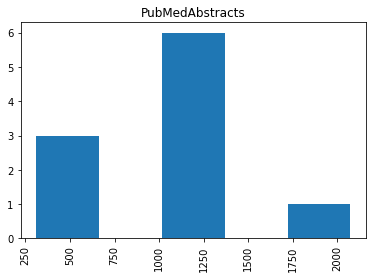

In [51]:
%%time
reviews.hist(column='length', by='source', bins=5)

In [52]:
def split_into_tokens(review):
    
    #review = unicode(review, 'iso-8859-1')# in python 3 the default of str() previously python2 as unicode() is utf-8
    return TextBlob(review).words

In [53]:


reviews.abstract.head().apply(split_into_tokens)



6    [Many, patients, who, present, with, otalgia, ...
3    [OBJECTIVE, To, examine, whether, watchful, wa...
4    [BACKGROUND, Information, on, patient, symptom...
8    [The, importance, of, the, cervical, spine, in...
2    [Otalgia, is, a, common, symptom, in, general,...
Name: abstract, dtype: object

In [54]:
TextBlob("hello world, how is it going?").tags

[('hello', 'JJ'),
 ('world', 'NN'),
 ('how', 'WRB'),
 ('is', 'VBZ'),
 ('it', 'PRP'),
 ('going', 'VBG')]

In [55]:


import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']

In [57]:
def split_into_lemmas(review):
    #review = unicode(review, 'iso-8859-1')
    review = review.lower()
    #review = unicode(review, 'utf8').lower()
    #review = str(review).lower()
    words = TextBlob(review).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

reviews.abstract.head().apply(split_into_lemmas)

6    [many, patient, present, otalgia, normal, otol...
3    [objective, examine, whether, watchful, waitin...
4    [background, information, patient, symptom, ob...
8    [importance, cervical, spine, routine, ent, pr...
2    [otalgia, common, symptom, general, practice, ...
Name: abstract, dtype: object

In [58]:
%%time
# bag of words on the comments
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(reviews['abstract'])
print(len(bow_transformer.vocabulary_))


490
Wall time: 78.1 ms


In [59]:
review4 = reviews['abstract'][4]
print(review4)

BACKGROUND:

Information on patient symptoms can be obtained by patient self-report or medical records review. Both methods have limitations.
AIMS:

To assess the agreement between self-report and documentation in the medical records of signs/symptoms of respiratory illness (fever, cough, runny nose, sore throat, headache, sinus problems, muscle aches, fatigue, earache, and chills).
METHODS:

Respondents were 176 research participants in the Hutterite Influenza Prevention Study during the 2008-2009 influenza season with information about the presence or absence of signs/symptoms from both self-report and primary care medical records.
RESULTS:

Compared with medical records, lower proportions of self-reported fever, sore throat, earache, cough, and sinus problems were found. Total agreements between self-report and medical report of symptoms ranged from 61% (for sore throat) to 88% (for muscle aches and earache), with kappa estimates varying from 0.05 (for chills) to 0.41 (for cough) an

In [60]:
bow4 = bow_transformer.transform([review4])


In [61]:
%%time
reviews_bow = bow_transformer.transform(reviews['abstract'])
print('sparse matrix shape:', reviews_bow.shape)
print('number of non-zeros:', reviews_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1])))

sparse matrix shape: (10, 490)
number of non-zeros: 700
sparsity: 14.29%
Wall time: 78.1 ms


In [63]:

#reviews was permutated earlier, so taking the order is random
# Split/splice into training ~ 80% and testing ~ 20%
reviews_bow_train = reviews_bow[:8]
reviews_bow_test = reviews_bow[8:]
reviews_sentiment_train = reviews['pain'][:8]
reviews_sentiment_test = reviews['pain'][8:]

print(reviews_bow_train.shape)
print(reviews_bow_test.shape)



(8, 490)
(2, 490)


In [64]:
reviews_sentiment_test.unique()

array(['yes'], dtype=object)

In [65]:


%time 
review_sentiment = MultinomialNB().fit(reviews_bow_train, reviews_sentiment_train)



Wall time: 0 ns


In [67]:

print('predicted:', review_sentiment.predict(bow4)[0])
print('expected:', reviews.pain[4])



predicted: no
expected: no


In [68]:


predictions = review_sentiment.predict(reviews_bow_test)
print(predictions)



['yes' 'yes']


In [69]:
print('accuracy', accuracy_score(reviews_sentiment_test, predictions))
print('confusion matrix\n', confusion_matrix(reviews_sentiment_test, predictions))
print('(row=expected, col=predicted)')

accuracy 1.0
confusion matrix
 [[2]]
(row=expected, col=predicted)


In [70]:
print(classification_report(reviews_sentiment_test, predictions))
#The F1 score can be interpreted as a weighted average of the precision and recall, 
#where an F1 score reaches its best value at 1 and worst score at 0.

              precision    recall  f1-score   support

         yes       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [71]:
def predict_review(new_review): 
    new_sample = bow_transformer.transform([new_review])
    print(new_review, np.around(review_sentiment.predict_proba(new_sample), decimals=2), 
          '\n')

### Values returned alphabatized for Type: no, yes are values returned in the array order

In [74]:
predict_review('my ear hurts.')

predict_review('I have been in pain for a month.')

predict_review('The antibiotics aren\'t working.')
predict_review('I don\'t like spaghetti.')

predict_review('I cannot eat without my ear bugging me.')

my ear hurts. [[0.06 0.94]] 

I have been in pain for a month. [[0.07 0.93]] 

The antibiotics aren't working. [[0.88 0.12]] 

I don't like spaghetti. [[0.5 0.5]] 

I cannot eat without my ear bugging me. [[0.03 0.97]] 



#### Using the input strings above, the 1st, 2nd, and 5th strings are pain likely, while it is a tie on the 4th string for pain, and the 3rd string is likely not pain.


In [76]:
reviews.groupby('pain').describe()

length                                                                 
      count         mean         std    min     25%     50%      75%     max
pain                                                                        
no      4.0  1224.250000  667.834498  442.0  981.25  1190.5  1433.50  2074.0
yes     6.0   975.833333  432.590068  311.0  705.75  1139.5  1297.25  1354.0

If you get back the probabilities, it is because there weren't a bag of words generated or improperly set to the type
instead of the comments or reviews.